#                         Handwritten Digits Classifier Using DL

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer to see how the performance of the model improves 

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train[0].shape

(28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

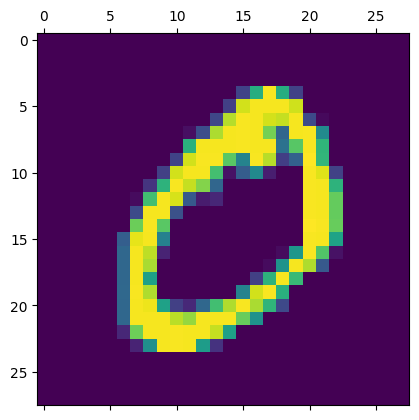

In [14]:
plt.matshow(X_train[1])

In [16]:
y_train[1]

0

In [18]:
X_train=X_train/255
X_test=X_test/255

In [19]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Now the data X_train and X_test data needs to be reshaped inorder to provide it to the neural network

In [20]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [21]:
X_train_flattened.shape

(60000, 784)

In [23]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
    )
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4632 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3033 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2832 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2666 - accuracy: 0.9262


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2697 - accuracy: 0.9250


[0.26970189809799194, 0.925000011920929]

In [28]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 2s 5ms/step


In [30]:
y_predicted[0]

array([3.7705444e-02, 4.9236507e-07, 4.7240827e-02, 9.6726727e-01,
       2.6595388e-03, 1.5118322e-01, 1.5539913e-06, 9.9989474e-01,
       1.0535805e-01, 7.1121466e-01], dtype=float32)

In [31]:
np.argmax(y_predicted[0])

7

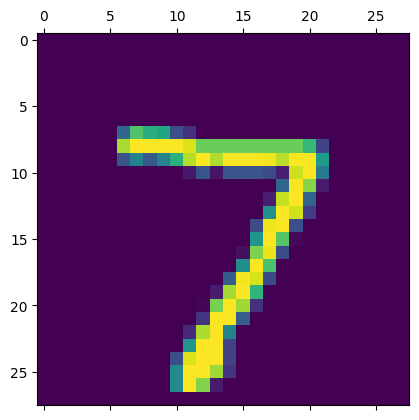

In [32]:
plt.matshow(X_test[0])

### So for the y_predicted if we need the result predicted we need to get the max out of the array that we are getting from y_predicted 

In [33]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

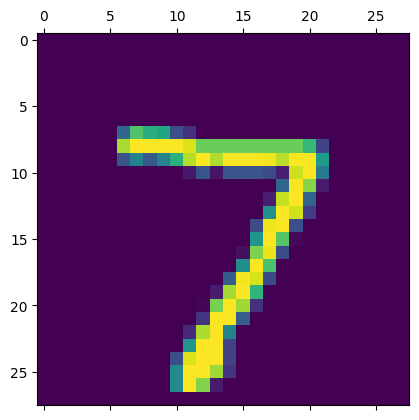

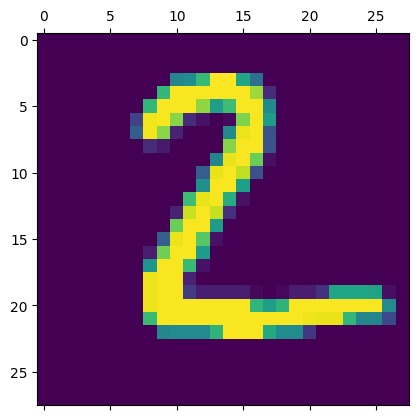

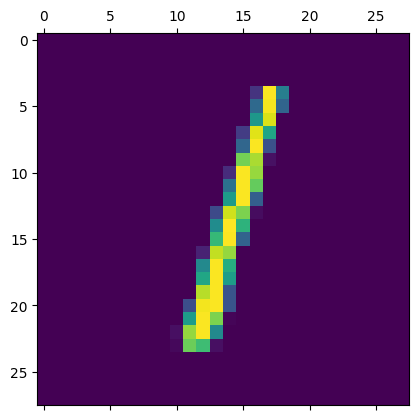

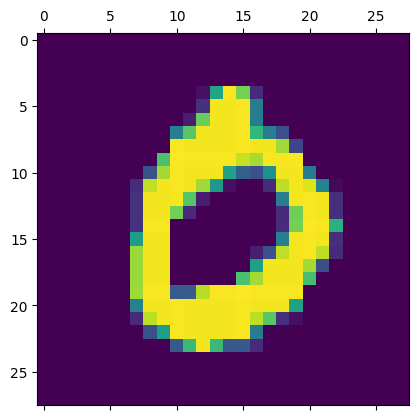

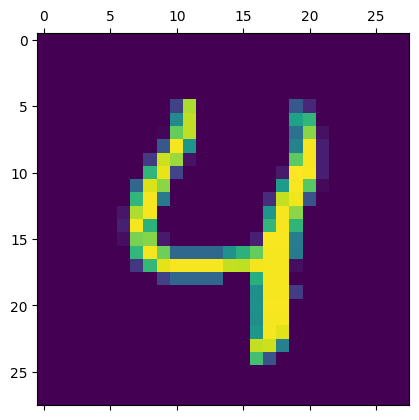

In [38]:
for i in range(5):
    plt.matshow(X_test[i])

In [34]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

So we got the correct predictions here

## Lets plot the Confusion Matrix here and see the errors 

In [44]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    1,    0,    5,    3,    4,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   9,   10,  904,   16,    8,    5,   13,   13,   49,    5],
       [   4,    0,   15,  916,    0,   27,    2,   14,   26,    6],
       [   1,    1,    3,    1,  906,    0,   11,    7,   11,   41],
       [  11,    3,    3,   26,    9,  778,   13,    9,   34,    6],
       [  14,    3,    5,    1,    7,   15,  908,    2,    3,    0],
       [   1,    6,   19,    5,    4,    0,    0,  971,    3,   19],
       [   8,    8,    5,   18,    9,   25,    7,   14,  874,    6],
       [  11,    7,    1,    9,   21,    8,    0,   30,    6,  916]])>

### Lets see the confusion matrix in the form of the heatmap

Text(95.72222222222221, 0.5, 'Truth')

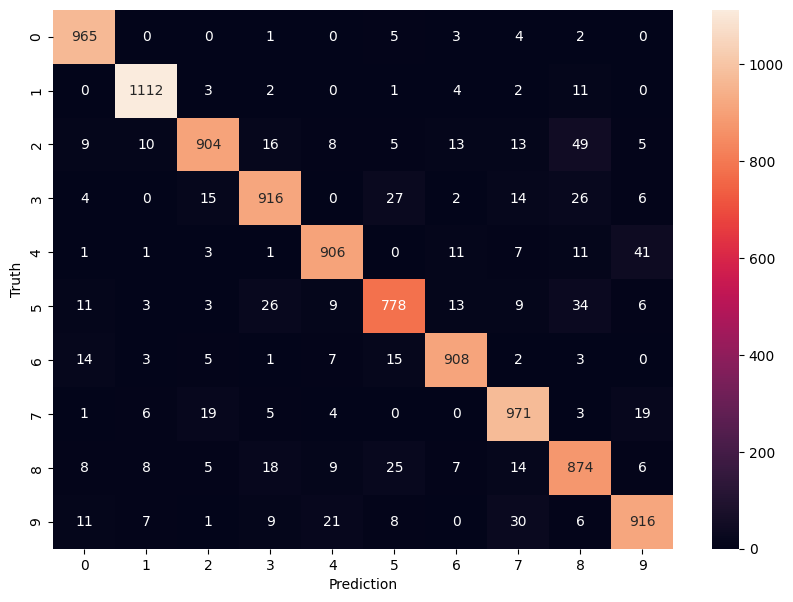

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

### As we can see in the above confusion matrix that errors are there in the predictions .So lets use hidden layer in order to get more accurate model and to reduce the errors in the Confusion Matrix

## Model with Hidden Layer 

In [51]:
model_=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model_.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
         
)

model_.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 8ms/step - loss: 0.2756 - accuracy: 0.9217
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1245 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0875 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0666 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0517 - accuracy: 0.9841


In [52]:
model_.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0915 - accuracy: 0.9730


[0.09151659905910492, 0.9729999899864197]

In [54]:
y_predicted_=model_.predict(X_test_flattened)

313/313 [==============================] - 2s 5ms/step


In [56]:
y_predicted_labels_=[np.argmax(i) for i in y_predicted_]

In [57]:
y_predicted_labels_[0]

7

In [63]:
cm_=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_)
cm_

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    1,    7,    5,    0,    0,    0,    2,    2,    0],
       [   0, 1123,    6,    1,    0,    1,    1,    1,    2,    0],
       [   0,    0, 1019,    5,    1,    0,    2,    4,    1,    0],
       [   0,    0,    6,  999,    0,    0,    0,    2,    3,    0],
       [   0,    0,    6,    0,  959,    0,    2,    5,    2,    8],
       [   2,    0,    0,   32,    1,  848,    4,    1,    4,    0],
       [   4,    3,    2,    4,    3,    2,  939,    0,    1,    0],
       [   1,    7,   14,    4,    0,    0,    0,  999,    0,    3],
       [   3,    1,   20,   26,    2,    3,    5,    6,  905,    3],
       [   1,    5,    1,   13,    5,    1,    1,    6,    0,  976]])>

Text(95.72222222222221, 0.5, 'Truth')

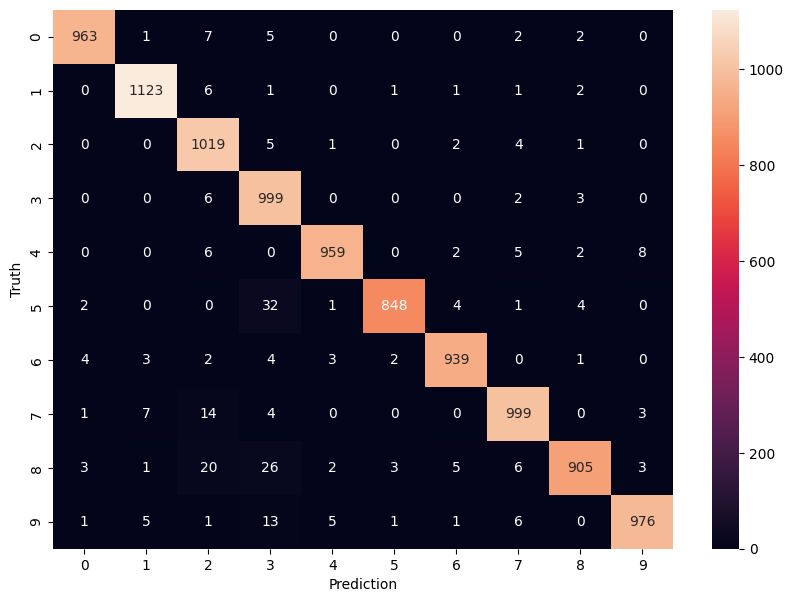

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

### As we can see that accuracy of the model increases by using the hidden layers in the neural network and the errors in the confusion matrix also increased

## Now using Flatten layer so that we don't have to call .reshape on input dataset

In [65]:
model_flatten = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model_flatten.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_flatten.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 22s 10ms/step - loss: 0.2796 - accuracy: 0.9215
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1277 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0895 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0679 - accuracy: 0.9790
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0351 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step

In [66]:
model_flatten.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0846 - accuracy: 0.9767


[0.08457104116678238, 0.9767000079154968]